In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
import os
import pandas as pd

data_folder = '/content/drive/MyDrive/Colab Notebooks/data'

all_data = pd.DataFrame()

for activity_folder in os.listdir(data_folder):
    activity_path = os.path.join(data_folder, activity_folder)
    if not os.path.isdir(activity_path):
        continue

    for file_name in os.listdir(activity_path):
        file_path = os.path.join(activity_path, file_name)
        if not file_name.endswith('.csv'):
            continue

        df = pd.read_csv(file_path)

        df['activity'] = activity_folder

        all_data = pd.concat([all_data, df])

all_data = all_data.sample(frac=1).reset_index(drop=True)

X = all_data.drop('activity', axis=1)
y = all_data['activity']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train['time_mean'] = X_train.mean(axis=1)
X_test['time_mean'] = X_test.mean(axis=1)

In [ ]:
svm_model = SVC()
rf_model = RandomForestClassifier()

In [ ]:
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [51]:
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Точність:")
print(f"SVM: {svm_accuracy}")
print(f"Random Forest: {rf_accuracy}")

Accuracy:
SVM: 0.8941246260187764
Random Forest: 0.9994583720210461


In [52]:
from sklearn.metrics import classification_report

svm_report = classification_report(y_test, svm_pred)
rf_report = classification_report(y_test, rf_pred)

print("Результати:")
print("SVM:")
print(svm_report)
print("Random Forest:")
print(rf_report)


Результати:
SVM:
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      6315
     running       0.93      0.90      0.92     20550
      stairs       1.00      0.01      0.01       981
     walking       0.80      0.91      0.85     10926

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772

Random Forest:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6315
     running       1.00      1.00      1.00     20550
      stairs       1.00      0.99      0.99       981
     walking       1.00      1.00      1.00     10926

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



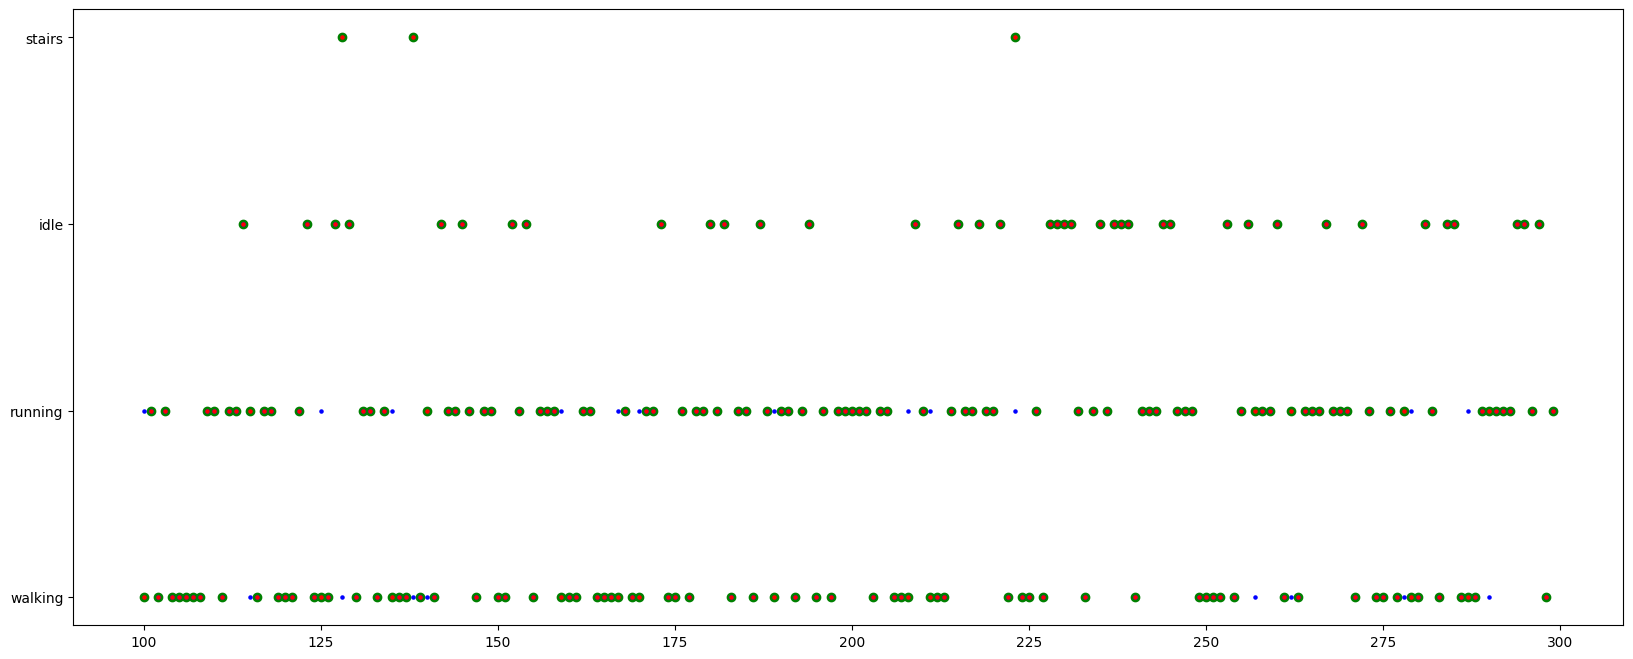

In [99]:
import numpy as np
from matplotlib import pyplot as plt

df_res = pd.DataFrame({'svm':svm_pred, 'rf': rf_pred, 'test':y_test})
df_res.index = np.arange(0, len(df_res))
df_cut_res = df_res[100:300]

indexes = df_cut_res.index.values

plt.figure(figsize=(20,8))
plt.scatter(indexes, df_cut_res['test'], c='green')
plt.scatter(indexes, df_cut_res['svm'], c='blue', s=5)
plt.scatter(indexes, df_cut_res['rf'], c='red', s=5)
plt.show()